<a href="https://colab.research.google.com/github/MatteoGandetto/Corso_ML_con_Python/blob/master/Regressione_Polinomiale.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# IMPORT GENERAL LIBRARIES

In [0]:
# package for scientific computing
import numpy as np

#collection of command style functions that make matplotlib work like MATLAB
import matplotlib.pyplot as plt 

#data analysis and manipulation tool
import pandas as pd 

# IMPORT DATA FROM EXTERNAL SOURCE

INPUT DATASET
   Superficie   Prezzo
0          60   338611
1          70   655033
2         140  5697001
3         150  7011305
4          79   534887
Dimensione: (108, 2) 

Dimensione features vectors (108,) 
Dimensione output (108,)


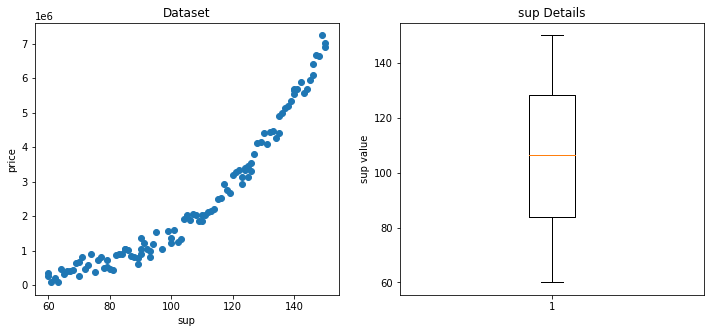

In [34]:

path='https://raw.githubusercontent.com/MatteoGandetto/Corso_ML_con_Python/master/Regressione_Polinomiale_IN.csv'
INPUT_df=pd.read_csv(path)

print('INPUT DATASET')
print(INPUT_df.head())
print('Dimensione:',INPUT_df.shape,'\n')

#remove all NaN
# 0 -> rows
# 1 -> columns
INPUT_df=INPUT_df.dropna(1,'all')
INPUT_df=INPUT_df.dropna(0,'all')


#convert to NumPy array
np_IN=np.array(INPUT_df)
np_IN_X=np_IN[:,0]
np_IN_y=np_IN[:,1]
print('Dimensione features vectors',np_IN_X.shape,'\nDimensione output',np_IN_y.shape)

#plot data
fig, axs = plt.subplots(1,2)
fig.set_size_inches(12,5)

axs[0].scatter(np_IN_X, np_IN_y)
axs[0].set_xlabel('sup')
axs[0].set_ylabel('price')
axs[0].set_title('Dataset')

axs[1].boxplot(np_IN_X)
axs[1].set_ylabel('sup value')
axs[1].set_title('sup Details')
fig.show()

# LIBRARIES FOR MACHINE LEARNING

In [0]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# DATA PRE-PROCESSING

In [0]:
# split dataset in training part and test part
# if train_size and test_size are not defined,the train_size=0.75 and test_size=0.25
X_train, X_test, y_train, y_test = train_test_split(np_IN_X,np_IN_y,test_size=0.25)


# SIMPLE LINEAR SOLUTION

TEST
R^2= 0.8977732609470181 
MSE= 445160450061.797729 

TRAIN
R^2= 0.9003385923013704 
MSE= 390812840167.561829 



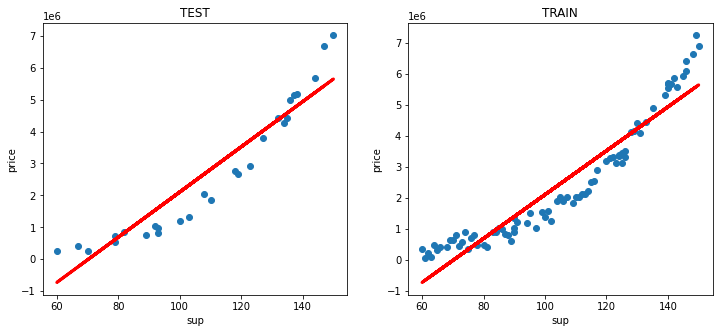

In [37]:
#reshape features to be used with LinearRegression's methods
X_train_r=np.reshape(X_train,(-1, 1))
X_test_r=np.reshape(X_test,(-1, 1))
X_all=np.reshape(np_IN_X,(-1,1))

#train the linear regressor
reg = LinearRegression().fit(X_train_r, y_train)

#y_pred is a linear prediction of X_test
y_pred_test=reg.predict(X_test_r)
y_pred_train=reg.predict(X_train_r)

#evaluate the model by using R=1-RSE and MSE
R2=reg.score(X_test_r,y_test)
MSE = mean_squared_error( y_test,y_pred_test)
R2_train=reg.score(X_train_r,y_train)
MSE_train = mean_squared_error(y_train,y_pred_train)
print ('TEST\nR^2=',R2,'\nMSE= %f \n' % MSE)
print ('TRAIN\nR^2=',R2_train,'\nMSE= %f \n' % MSE_train)

#show the solution
fig, axs = plt.subplots(1,2)
fig.set_size_inches(12,5)


axs[0].set_xlabel('sup')
axs[0].set_ylabel('price')
axs[0].set_title('TEST')
axs[0].scatter(X_test,y_test)
axs[0].plot(X_test,y_pred_test,c='red',linewidth=3)

axs[1].set_title('TRAIN')
axs[1].set_xlabel('sup')
axs[1].set_ylabel('price')
axs[1].scatter(X_train,y_train)
axs[1].plot(X_train,y_pred_train,c='red',linewidth=3)

fig.show()

# POLYNOMIAL SOLUTION

In [38]:
# Import methods
from sklearn.preprocessing import PolynomialFeatures

#modify features to polynomial aspect
poly_reg = PolynomialFeatures(degree=3)
X_poly_train = poly_reg.fit_transform(X_train_r)
X_poly_test = poly_reg.fit_transform(X_test_r)
X_poly_all = poly_reg.fit_transform(X_all)


#train the Linear Regression with trandformed 'polinomially' features
pol_reg = LinearRegression()
pol_reg.fit(X_poly_train, y_train)

#y_pred_xxx is a prediction of X_poly_xxx
y_pred_test=pol_reg.predict(X_poly_test)
y_pred_train=pol_reg.predict(X_poly_train)
y_pred_all=pol_reg.predict(X_poly_all)

#evaluate the model by using R=1-RSE and MSE
R2=pol_reg.score(X_poly_test,y_test)
MSE = mean_squared_error( y_test,y_pred_test)
R2_train=pol_reg.score(X_poly_train,y_train)
MSE_train = mean_squared_error(y_train,y_pred_train)
print ('TEST\nR^2=',R2,'\nMSE= %f \n' % MSE)
print ('TRAIN\nR^2=',R2_train,'\nMSE= %f \n' % MSE_train)



TEST
R^2= 0.9901029209579916 
MSE= 43098197217.796844 

TRAIN
R^2= 0.9902626467058547 
MSE= 38184115441.229134 



# PLOT RESULTS

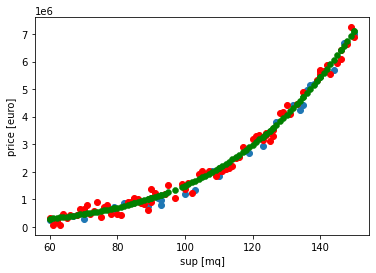

In [39]:
#show the solution
fig, axs = plt.subplots(1,1)

axs.set_xlabel('sup [mq]')
axs.set_ylabel('price [euro]')
axs.scatter(X_test,y_test)
axs.scatter(X_train,y_train,color='red')
axs.scatter(X_all,y_pred_all,c='green',linewidth=0.5)
fig.show()

fig.show()